In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Air Fare.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
df.shape

(10683, 11)

In [7]:
df.dropna(inplace = True)
df.shape

(10682, 11)

In [8]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [9]:
df["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [10]:
df["Destination"].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [11]:
df["Destination"] = df["Destination"].replace('New Delhi', 'Delhi')
df["Destination"].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [12]:
df = df[df['Source'] != df["Destination"]]
df.shape

(10682, 11)

In [13]:
def change_into_datetime(col):
  df[col]=pd.to_datetime(df[col])

In [14]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
  change_into_datetime(i)

C:\Users\NAVEENKUMAR K\AppData\Local\Temp\ipykernel_4064\1668332394.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col]=pd.to_datetime(df[col])
C:\Users\NAVEENKUMAR K\AppData\Local\Temp\ipykernel_4064\1668332394.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col]=pd.to_datetime(df[col])
C:\Users\NAVEENKUMAR K\AppData\Local\Temp\ipykernel_4064\1668332394.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col]=pd.to_datetime(df[col])


In [15]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month
df.drop('Date_of_Journey',axis=1,inplace=True)

In [16]:
def extract_hour(df,col):
  df[col+'_hour']=df[col].dt.hour
def extract_min(df,col):
  df[col+'_minute']=df[col].dt.minute

def drop_column(df,col):
  df.drop(col,axis=1,inplace=True)

In [17]:
extract_hour(df,'Dep_Time')
extract_min(df,'Dep_Time')
drop_column(df,'Dep_Time')

extract_hour(df,'Arrival_Time')
extract_min(df,'Arrival_Time')
drop_column(df,'Arrival_Time')

In [18]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [19]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [20]:
duration=list(df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i] + ' 0m'
        else:
            duration[i]='0h '+ duration[i]

In [21]:
df['Duration']=duration
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [22]:
def hour(x):
    return x.split(' ')[0][0:-1]
def min(x):
    return x.split(' ')[1][0:-1]

In [23]:
df['Duration_hours']=df['Duration'].apply(hour)
df['Duration_mins']=df['Duration'].apply(min)
df.drop("Duration",axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [24]:
df.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int32
journey_month           int32
Dep_Time_hour           int32
Dep_Time_minute         int32
Arrival_Time_hour       int32
Arrival_Time_minute     int32
Duration_hours         object
Duration_mins          object
dtype: object

In [25]:
df['Duration_hours']=df['Duration_hours'].astype(int)
df['Duration_mins']=df['Duration_mins'].astype(int)

In [26]:
cat_col=[col for col in df.columns if df[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [27]:
num_col=[col for col in df.columns if df[col].dtype!='O']
num_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

In [28]:
categorical=df[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info


<Axes: xlabel='Airline', ylabel='Price'>

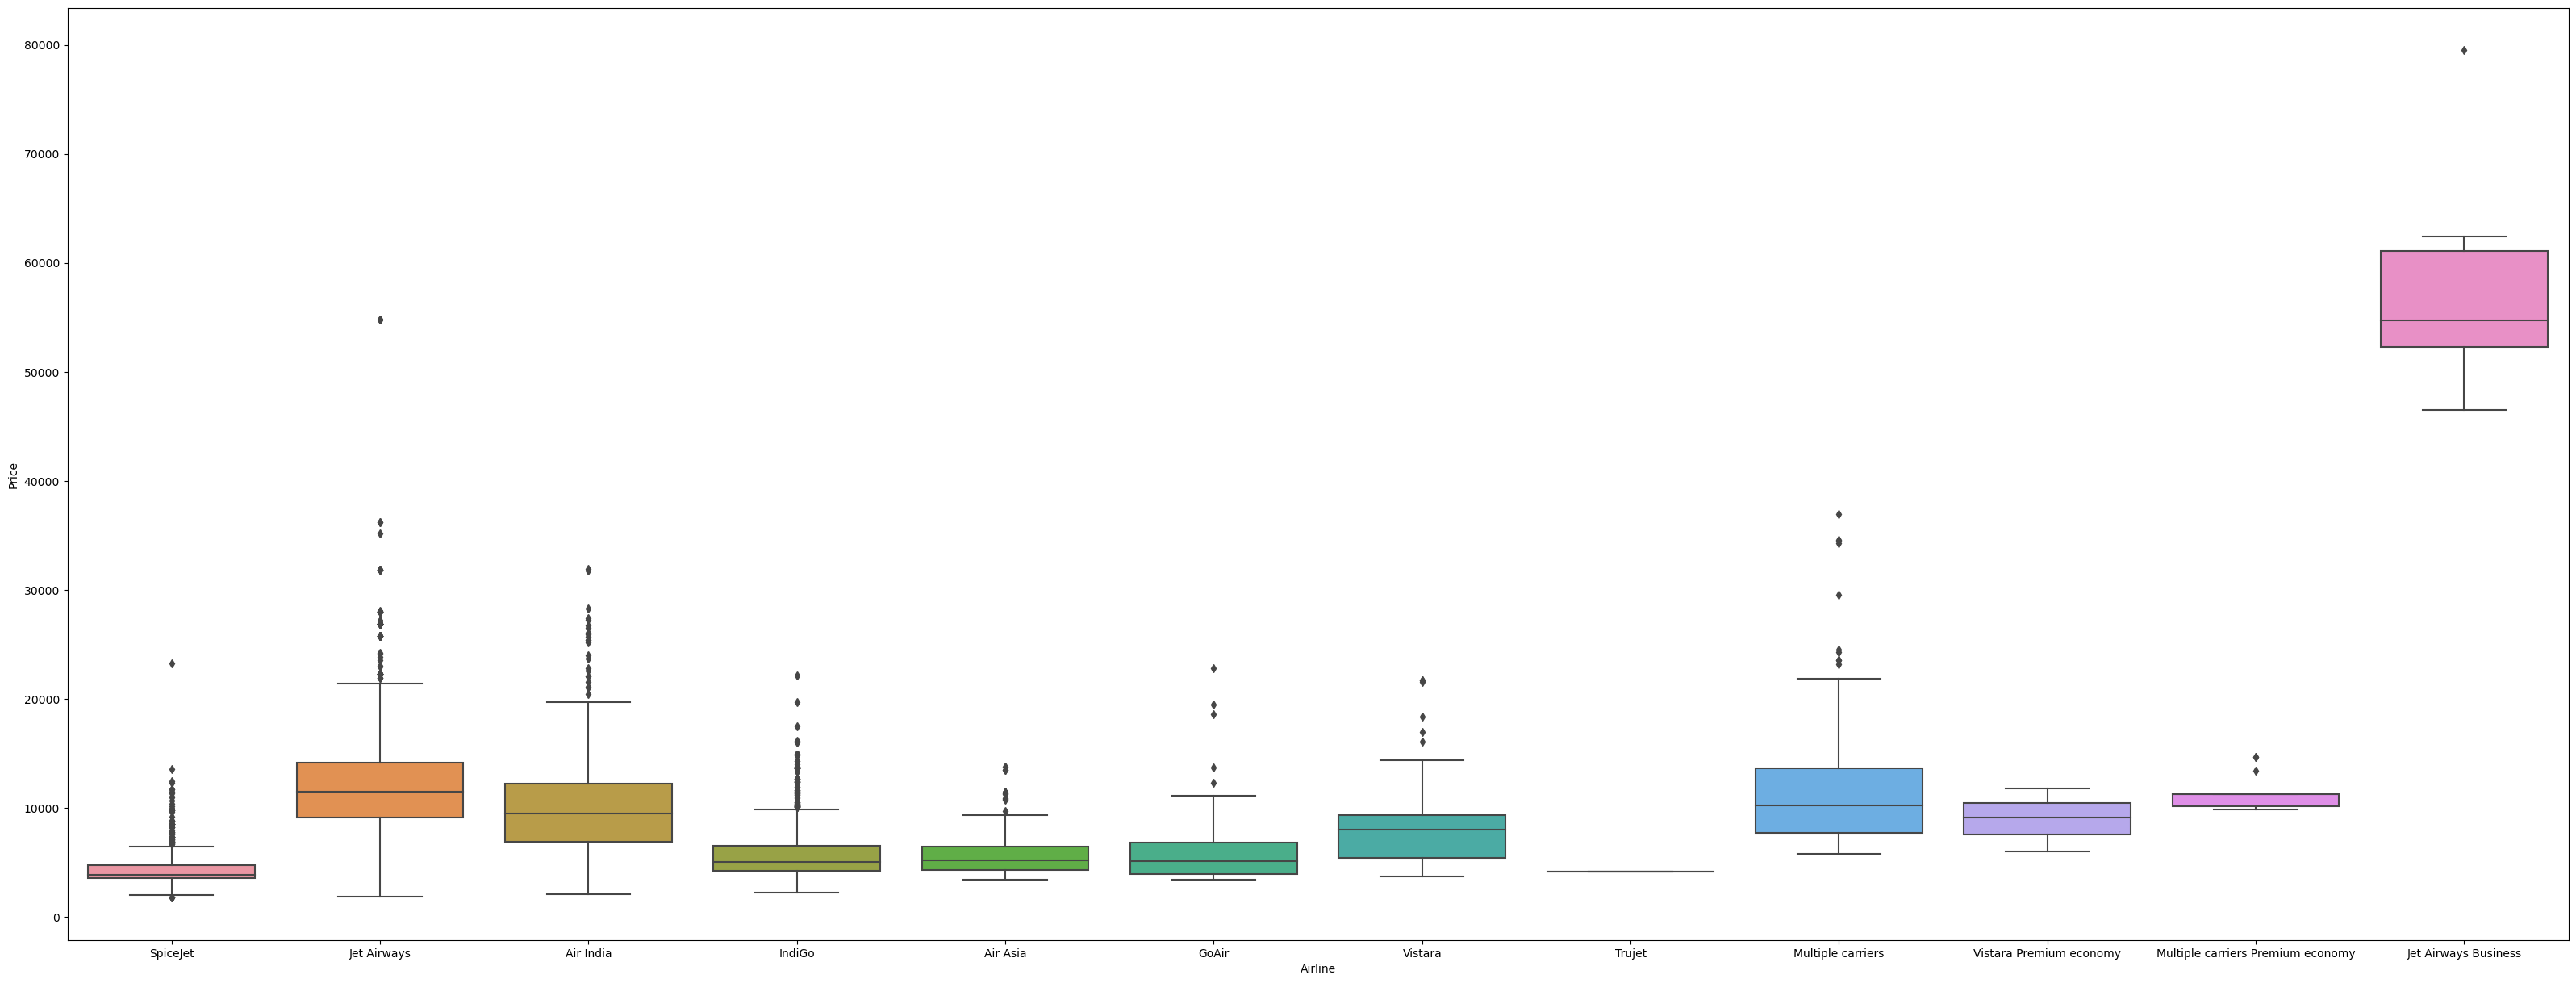

In [29]:
import seaborn as sns
plt.figure(figsize=(40,15))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=True))
# plt.xticks(rotation=90)


<Axes: xlabel='Total_Stops', ylabel='Price'>

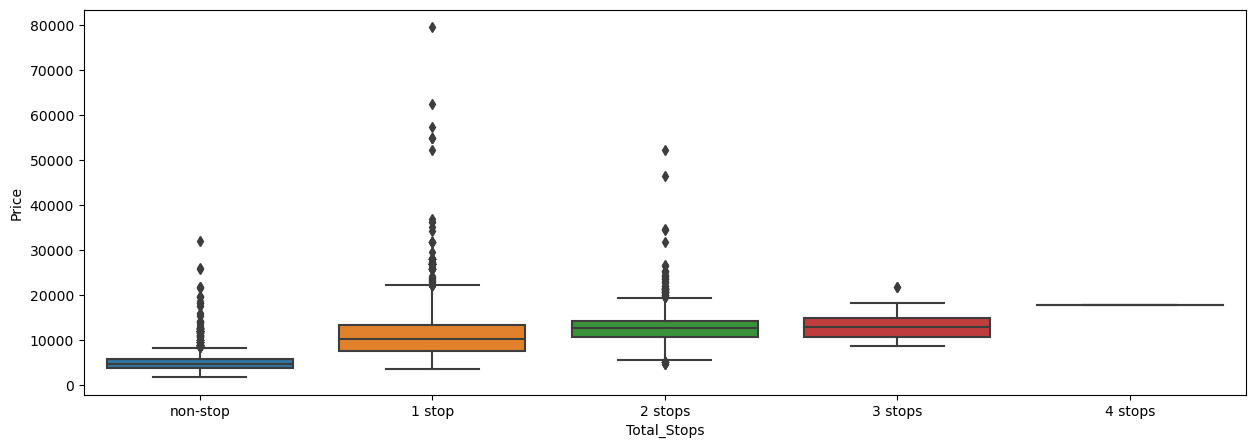

In [30]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=True))

<Axes: xlabel='Source', ylabel='Price'>

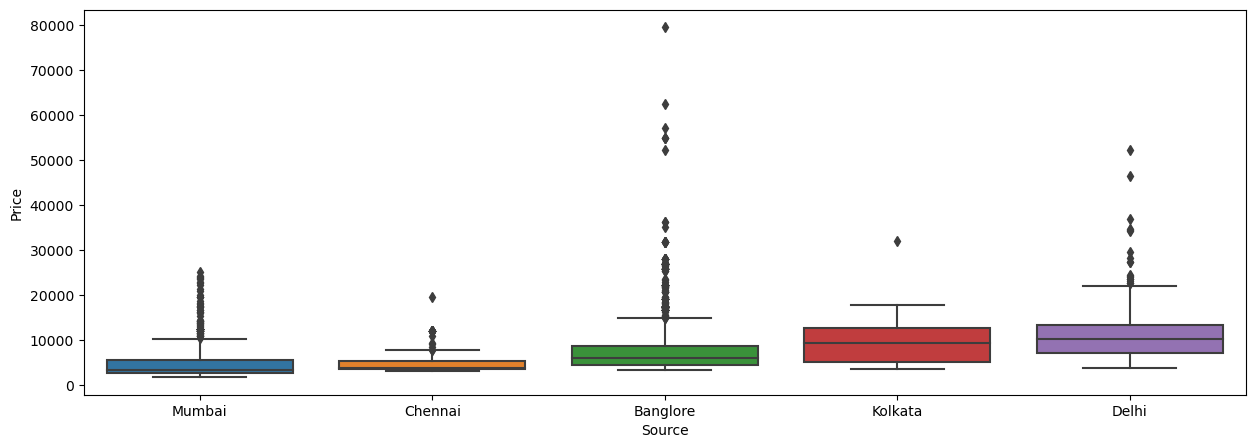

In [31]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Source',y='Price',data=df.sort_values('Price',ascending=True))

<Axes: xlabel='Destination', ylabel='Price'>

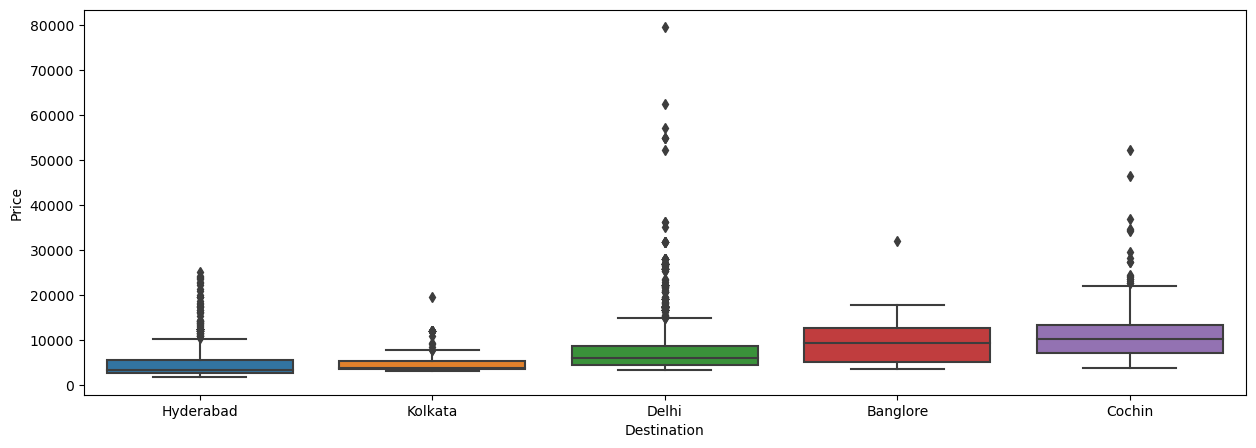

In [32]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=True))

In [33]:
Airline = pd.get_dummies(categorical['Airline'],drop_first=True)
Source = pd.get_dummies(categorical['Source'],drop_first=True)
Destination = pd.get_dummies(categorical['Destination'],drop_first=True)

In [34]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

C:\Users\NAVEENKUMAR K\AppData\Local\Temp\ipykernel_4064\279739503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_1']=categorical['Route'].str.split('→').str[0]
C:\Users\NAVEENKUMAR K\AppData\Local\Temp\ipykernel_4064\279739503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_2']=categorical['Route'].str.split('→').str[1]
C:\Users\NAVEENKUMAR K\AppData\Local\Temp\ipykernel_4064\279739503.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [35]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [36]:
categorical.drop("Route",axis=1, inplace = True)

C:\Users\NAVEENKUMAR K\AppData\Local\Temp\ipykernel_4064\322987749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical.drop("Route",axis=1, inplace = True)


In [37]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [38]:
for i in ['Route_3','Route_4','Route_5']:
  categorical[i].fillna('None',inplace=True)
categorical.head()

C:\Users\NAVEENKUMAR K\AppData\Local\Temp\ipykernel_4064\1715793354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i].fillna('None',inplace=True)


,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,Delhi,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,Delhi,1 stop,No info,BLR,NAG,DEL,None,None


In [39]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
  categorical[i]=encoder.fit_transform(categorical[i])
categorical.head()

C:\Users\NAVEENKUMAR K\AppData\Local\Temp\ipykernel_4064\2441271666.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]=encoder.fit_transform(categorical[i])
C:\Users\NAVEENKUMAR K\AppData\Local\Temp\ipykernel_4064\2441271666.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]=encoder.fit_transform(categorical[i])
C:\Users\NAVEENKUMAR K\AppData\Local\Temp\ipykernel_4064\2441271666.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,Delhi,1 stop,No info,0,34,8,13,5


In [40]:
categorical['Total_Stops'].unique()
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)
categorical.head()

C:\Users\NAVEENKUMAR K\AppData\Local\Temp\ipykernel_4064\784275054.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops']=categorical['Total_Stops'].map(dict)


,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,Delhi,0,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,No info,2,34,3,13,5
4,IndiGo,Banglore,Delhi,1,No info,0,34,8,13,5


In [41]:
categorical.drop("Additional_Info",axis=1, inplace = True)
categorical.drop("Destination",axis=1, inplace = True)
categorical.drop("Source",axis=1, inplace = True)
categorical.drop("Airline",axis=1, inplace = True)

C:\Users\NAVEENKUMAR K\AppData\Local\Temp\ipykernel_4064\2382008292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical.drop("Additional_Info",axis=1, inplace = True)
C:\Users\NAVEENKUMAR K\AppData\Local\Temp\ipykernel_4064\2382008292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical.drop("Destination",axis=1, inplace = True)
C:\Users\NAVEENKUMAR K\AppData\Local\Temp\ipykernel_4064\2382008292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [42]:
categorical.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,0,13,29,13,5
1,2,2,25,1,3,5
2,2,3,32,4,5,5
3,1,2,34,3,13,5
4,1,0,34,8,13,5


In [43]:
df1=pd.concat([categorical,Airline,Destination,Source,df[num_col]],axis=1)
df1.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,Mumbai,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,False,False,True,False,...,False,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,True,False,False,False,...,False,7662,1,5,5,50,13,15,7,25
2,2,3,32,4,5,5,False,False,False,True,...,False,13882,9,6,9,25,4,25,19,0
3,1,2,34,3,13,5,False,False,True,False,...,False,6218,12,5,18,5,23,30,5,25
4,1,0,34,8,13,5,False,False,True,False,...,False,13302,1,3,16,50,21,35,4,45


In [44]:
X = df1.drop('Price',axis=1)
y = df1["Price"]
X.shape, y.shape

((10682, 33), (10682,))

In [45]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(X,y)
imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,1.922171
Route_1,2.300546
Route_2,3.006208
Route_3,2.530961
Route_4,1.706698
Route_5,1.444780
Air India,0.694363
GoAir,0.073756
IndiGo,0.622090
Jet Airways,0.881635


In [46]:
type(X)

pandas.core.frame.DataFrame

In [47]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)


,importance
Route_2,3.006208
Route_3,2.530961
Route_1,2.300546
Total_Stops,1.922171
Arrival_Time_hour,1.882772
Duration_hours,1.784637
Route_4,1.706698
Arrival_Time_minute,1.614201
journey_month,1.585775
Dep_Time_hour,1.498234


In [48]:
col_drop = imp[imp['importance'] < 0.1].index.tolist()
col_drop

['GoAir',
 'Jet Airways Business',
 'Multiple carriers Premium economy',
 'Trujet',
 'Vistara Premium economy']

In [49]:
X.drop(columns=col_drop, inplace=True)
X.shape

(10682, 28)

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8545, 28), (2137, 28), (8545,), (2137,))

In [51]:
from sklearn import metrics
def predict(ml_model,):
  model=ml_model.fit(X_train,y_train)
  print('Training Score {}'.format(model.score(X_train,y_train)))
  Predictions=model.predict(X_test)
  print('Predictions are {}'.format(Predictions))
  print('\n')
  r2_score=metrics.r2_score(y_test,Predictions)
  print('r2_score {}'.format(r2_score))
  print('MAE :',metrics.mean_absolute_error(y_test,Predictions))
  print('MSE :',metrics.mean_squared_error(y_test,Predictions))
  print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test,Predictions)))
  sns.distplot(y_test-Predictions)

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

Training Score 0.5869693702890311
Predictions are [16793.73246722 12562.44045533 11212.60394463 ...  5039.06674808
  3182.72055137  8249.98889026]


r2_score 0.496024882936523
MAE : 2065.7952941957674
MSE : 12671189.62118933
RMSE : 3559.661447552187


C:\Users\NAVEENKUMAR K\AppData\Local\Temp\ipykernel_4064\4281724634.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-Predictions)


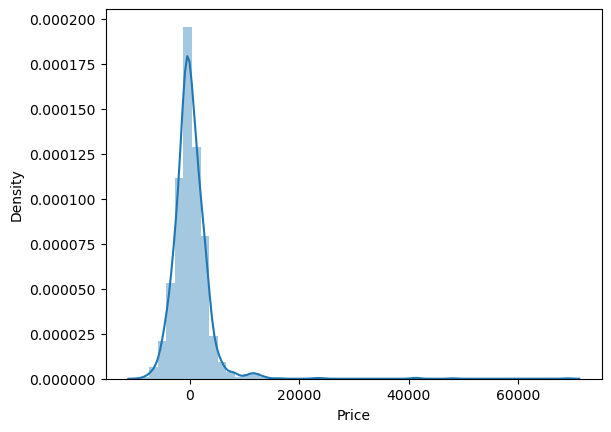

In [53]:
predict(LinearRegression())

Training Score 0.7667425936771617
Predictions are [16914.  12628.  12855.2 ...  6940.2  4379.4  6139.6]


r2_score 0.5858660922608001
MAE : 1739.9513336452972
MSE : 10412357.86422087
RMSE : 3226.818535991894


C:\Users\NAVEENKUMAR K\AppData\Local\Temp\ipykernel_4064\4281724634.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-Predictions)


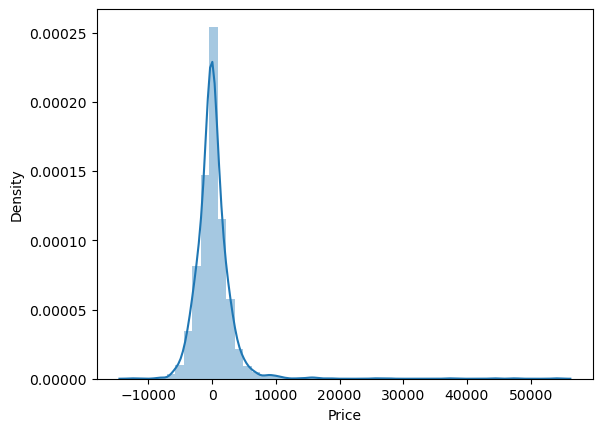

In [54]:
predict(KNeighborsRegressor())

Training Score 0.9529785065865567
Predictions are [20444.085 16628.6   13451.41  ...  3628.73   4832.17   5700.67 ]


r2_score 0.7772882748484569
MAE : 1221.9392011616262
MSE : 5599527.446316291
RMSE : 2366.332065944315


C:\Users\NAVEENKUMAR K\AppData\Local\Temp\ipykernel_4064\4281724634.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-Predictions)


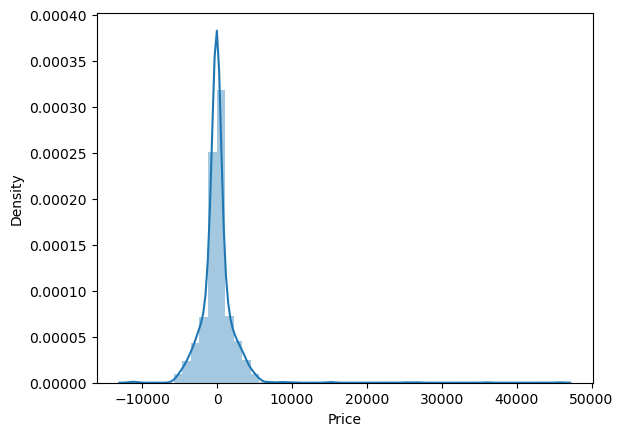

In [55]:
predict(RandomForestRegressor())

Training Score 0.9683588839527894
Predictions are [20694. 17057. 13587. ...  3597.  4823.  6195.]


r2_score 0.6634411270737881
MAE : 1414.6217360786147
MSE : 8461928.28405982
RMSE : 2908.9393744215126


C:\Users\NAVEENKUMAR K\AppData\Local\Temp\ipykernel_4064\4281724634.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-Predictions)


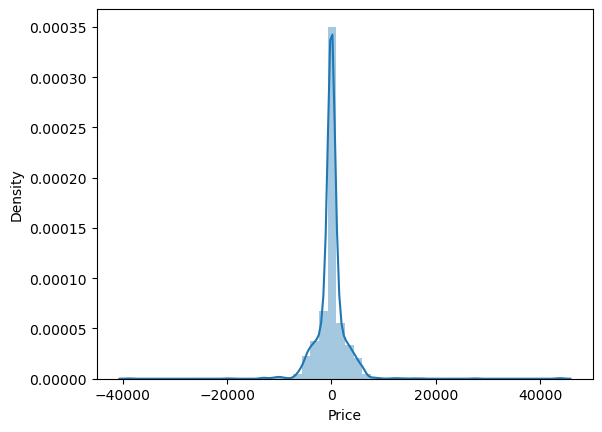

In [56]:
predict(DecisionTreeRegressor())